## Deep Learning Challenge

### Loading the CIFAR10 data
The data can be found directly in the package keras (`keras.datasets.cifar10`).

```python
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
```

https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.utils import to_categorical, normalize

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
# one hot encode target values
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

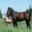

In [5]:
from PIL import Image
#only works before normalization
img = Image.fromarray(train_images[12])
img

### Task
Build the neural network (CNN) to predict the object in the images. Try to do it on your own first before consulting peers or the tutorials on the internet. If you are stuck early, reach out to our mentors who will point you in the right direction.

In [6]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (32, 32, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(784, activation = 'relu'))
classifier.add(Dense(60, activation = 'relu'))
classifier.add(Dense(80, activation = 'relu'))
classifier.add(Dense(10, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 10, 10, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 784)               627984    
_________________________________________________________________
dense_1 (Dense)              (None, 60)                47100     
_________________________________________________________________
dense_2 (Dense)              (None, 80)                4880      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                8

In [8]:
history = classifier.fit(train_images,train_labels, batch_size=32, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2801 - accuracy: 0.3991
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2164 - accuracy: 0.5097
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1957 - accuracy: 0.5650
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1788 - accuracy: 0.6110
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1626 - accuracy: 0.6540
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1468 - accuracy: 0.6916
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1300 - accuracy: 0.7323
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1151 - accuracy: 0.7628
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1019 - accuracy: 0.7943
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

KeyError: 'val_loss'

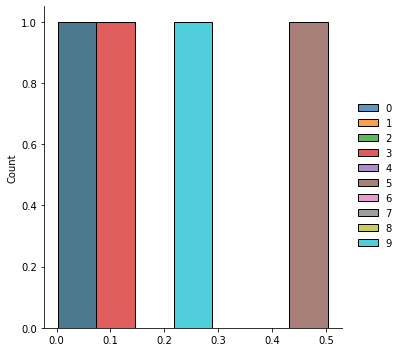

In [10]:
import numpy as np
from tensorflow.keras.preprocessing import image
# loading iamge from the disk
test_img_list = ['/home/henri/Documents/Lighthouse-lab/lighthouse-data-notes/Week_8/w8_d2/cat2.jpg','/home/henri/Documents/Lighthouse-lab/lighthouse-data-notes/Week_8/w8_d2/cat3.jpg']
  
test_image = image.load_img(test_img_list[0],target_size = (32,32))
# converting the image to a numpy array
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)
sns.displot(data=result)